### Simple ABM Implementation of Shooting Problem in "Causality and Counterfactuals in the Situation Calculus" by Hopkins and Pearl ###

#### Paul Cohen, Oct 3, 2022 ####

Following Jeremy's good suggestion that Hopkins and Pearl probabilistic situation calculus might be a good language in which to express models, and that the Mecha paclage might easily be used to implement such models, I started to write a Mecha model for the Shooting Problem.  Mecha is too heavy-weight for the problem so I wrote a very simple ABM in pandas/numpy.  

In [2]:
import os
os.chdir("../")

import numpy as np
from numpy.random import default_rng
rng = default_rng() # stuff for random sampling

import pandas as pd
import matplotlib.pyplot as plt

# Number of sampled conditions
n = 10000

def prob(col):
    return np.sum(col)/n

def plot_results (results):
    plt.plot(results['pSignal'], label='pSignal', color='green')
    plt.plot(results['pShoots1'], label='pShoots1', color='lightblue')
    plt.plot(results['pShoots2'], label='pShoots2', color='steelblue')
    plt.plot(results['pDead'], label='pDead', color='red')
    plt.legend()
    plt.show()
    

I like to run the same experiment in multiple conditions in parallel by setting it up as an ABM.  We will have `n` conditions that sample probabilities of the captain signaling, the riflemen shooting and the prisoner dying. We initialize the simulation by specifying four parameters:

1) The probability that the captain wants to signal

2) The probability that rifleman 1 wants to shoot

3) The probability that rifleman 2 wants to shoot

4) The probability that the prisoner is already dead

In [3]:
def init_sim (p_wantsToSignal, p_wantsToShoot1, p_wantsToShoot2, p_alreadyDead): 
    ''' Make dataframes for simulation state and results.  Initialize the probabilities 
    of signaling and shooting at each time step'''
    
    df = pd.DataFrame(
        np.zeros((n,7)).astype(bool),
        columns=['wantsToSignal','Signal','wantsToShoot1','Shoots1','wantsToShoot2','Shoots2','dead'])
    
    results = pd.DataFrame(columns=['pSignal','pShoots1','pShoots2','pDead'])
    
    df.wantsToSignal = rng.random(n) < p_wantsToSignal
    df.wantsToShoot1 = rng.random(n) < p_wantsToShoot1
    df.wantsToShoot2 = rng.random(n) < p_wantsToShoot2
    df.dead = rng.random(n) < p_alreadyDead
    
    return df,results

df,results = init_sim(.7,.3,.8,.05)
df

,wantsToSignal,Signal,wantsToShoot1,Shoots1,wantsToShoot2,Shoots2,dead
0,True,False,False,False,True,False,False
1,True,False,False,False,True,False,False
2,True,False,True,False,True,False,True
3,True,False,True,False,True,False,False
4,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...
9995,True,False,False,False,True,False,True
9996,True,False,False,False,True,False,False
9997,True,False,False,False,True,False,False
9998,True,False,False,False,True,False,False


The rows are not unique.  Some are more common than others.  

Now we define four rules.

In [7]:
def Signals (p_hasty):
    # The captain will signal if he hasn't signaled, if he wants to signal, and
    # with a probability that is proportional to his haste
    df.Signal = (df.Signal) | ( (df.wantsToSignal) & (rng.random(n) < p_hasty) )
    
def Shoots1 (p_sloppy):
    # Rifleman 1 shoots is True if he has already shot, if he hears a signal and wants
    # to shoot, or if he's sloppy
    df.Shoots1 = df.Shoots1 | (df.Signal & df.wantsToShoot1) | (rng.random(n) < p_sloppy)
    
def Shoots2 (p_sloppy):
    # Rifleman 2 shoots is True if he has already shot, if he hears a signal and wants
    # to shoot, or if he's sloppy
    df.Shoots2 = df.Shoots2 | (df.Signal & df.wantsToShoot2) | (rng.random(n) < p_sloppy)
    
def Dies ():
    # The prisoner dies if either rifleman shoots
    df.dead = (df.dead) | (df.Shoots1) | (df.Shoots2)
    
def doesnotShoots1():
    # Rifleman 1 shoots regardless of whether the Captain signals
    df.Shoots1 = False
    

Now we intialize the simulation and run all the rules at each of 20 time steps.

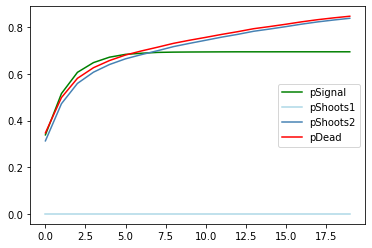

In [8]:
df,results = init_sim(.7,.3,.8,.05)

for i in range(20):
    Signals(.5)
    dontShoots1()
    Shoots2(.05)
    Dies()
    results.loc[len(results)] = [prob(df.Signal),prob(df.Shoots1),prob(df.Shoots2),prob(df.dead)]

    
plot_results(results)

In [9]:
results

,pSignal,pShoots1,pShoots2,pDead
0,0.3389,0.0,0.3132,0.3473
1,0.5158,0.0,0.4723,0.4987
2,0.6069,0.0,0.5594,0.5813
3,0.6486,0.0,0.6075,0.6267
4,0.6718,0.0,0.6404,0.6574
5,0.6839,0.0,0.6648,0.6811
6,0.6887,0.0,0.6830,0.6987
7,0.6923,0.0,0.6995,0.7146
8,0.6935,0.0,0.7172,0.7312
9,0.6940,0.0,0.7311,0.7445
